# Data analysis


In [59]:
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [60]:
#img1 = mpimg.imread('../data/testing/test_st1179sound_9.PNG')
#img2 = mpimg.imread('../data/testing/test_st1179__dry_knot_1.PNG')

In [61]:
#f, (ax1, ax2) = plt.subplots(1, 2)
#ax1.imshow(img1)
#ax2.imshow(img2)

In [62]:
#df = pd.read_csv('../data/training/training_labels.txt', delim_whitespace=True, header=None, names=['filename', 'label'])


In [63]:
#df.head()

In [65]:
#df.label.value_counts()


In [88]:
from PIL import Image
import h5py

path = '../data/training'
hdf5_path = '../data/hdf5'
training_file = 'training.h5'
testing_file = 'testing.h5'


dir = listdir(path)

files = [file for file in dir if file.endswith(".PNG")]

#images_shape = (len(files), 112, 112, 3)
#labels_shape = (len(files),)
#
images_shape = (6, 112, 112, 3)
labels_shape = (6,)


hdf5_training = h5py.File(join(hdf5_path, training_file),  mode='w')
images = hdf5_training.create_dataset("images", images_shape, np.uint8)
labels = hdf5_training.create_dataset("labels", labels_shape, np.uint8)


label_list = ['sound', 'split', 'wane', 'sound_knot', 'dry_knot', 'core_stripe', 'small_knot']


i=0
for name in files:
    im = Image.open(join(path, name))
    label = name[name.find('_')+1 : name.rfind('_')]
    if label in label_list:
       labels[i] = label_list.index(label)  
       images[i] = np.array(im)
    i += 1  
    if i > 5 :
       break


#hdf5_training["labels"][...] = labels

hdf5_training.close()


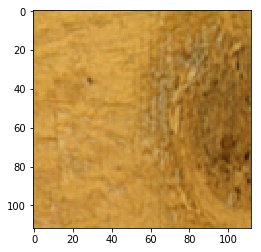

In [94]:
hd = h5py.File('../data/hdf5/training.h5')

im = hd['images'][1000]

plt.imshow(im)


In [91]:
im


array([[[127, 127,  91],
        [127, 127, 114],
        [127, 127, 117],
        ...,
        [127, 127, 121],
        [127, 127, 127],
        [127, 127, 127]],

       [[127, 127, 103],
        [127, 127, 102],
        [127, 127,  98],
        ...,
        [127, 127, 122],
        [127, 127, 122],
        [127, 127, 127]],

       [[127, 127,  99],
        [127, 127,  97],
        [127, 127, 102],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       ...,

       [[127, 127, 127],
        [127, 127, 125],
        [127, 127, 127],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[127, 127, 118],
        [127, 127, 120],
        [127, 127, 117],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 124]],

       [[127, 127, 127],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [127, 127, 127],
        [127, 127, 126],
        [127, 127, 121]]